# Customer Churn 

Müşteri kaybı veri kümesi, bir işletme için müşteri davranışı ve elde tutma hakkında içgörüler sağlayan bir veri koleksiyonudur. Genellikle demografik bilgiler (yaş, cinsiyet, konum), kullanım modelleri (hizmet kullanım sıklığı, hizmet aboneliği süresi) ve diğer ilgili özellikler gibi müşterilerin çeşitli niteliklerini içerir. Bu veri kümesini analiz etmenin temel amacı, müşterilerin bir şirket veya hizmet sağlayıcı ile ilişkilerini kesmesi olgusunu ifade eden müşteri kaybını tahmin etmek veya anlamaktır. İşletmeler bu veri setini inceleyerek, müşteriyi elde tutmayı etkileyen faktörler hakkında değerli bilgiler edinebilir ve müşteri kaybını azaltmak için stratejiler geliştirebilir, sonuçta müşteri memnuniyetini ve sadakatini artırabilir.

Sütun, tahmini maaş, yaş, cinsiyet vb. ile ilgilidir. Bir çalışanla ilgili tüm ayrıntıları sağlamayı amaçlamaktadır.



In [1]:
def plot_loss(model):
    plt.figure(figsize=(12,10))
    epochs = range(1,101)
    train_loss=model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    sns.lineplot(x=epochs, y=train_loss, label="Training Loss")
    sns.lineplot(x=epochs, y=val_loss, label = "Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
def plot_acc(model):
    plt.figure(figsize=(12,10))
    epochs=range(1,101)
    train_acc = model_history.history["accuracy"]
    val_acc = model_history.history["val_accuracy"]
    sns.lineplot(x=epochs, y=train_acc, label="Training Accuracy")
    sns.lineplot(x=epochs, y=val_acc, label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.show()

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model, to_categorical
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
dfr = pd.read_csv("Churn_Modelling.csv")

In [4]:
df= dfr.copy()

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Explory Data Analysis (EDA)

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df["Geography"] = df["Geography"].map({"Germany":0,"France":1, "Spain":2})
df["Gender"] = df["Gender"].map({"Male":0,"Female":1})

In [15]:
df.iloc[:, -1:].value_counts(normalize=True)

Exited
0         0.7963
1         0.2037
Name: proportion, dtype: float64

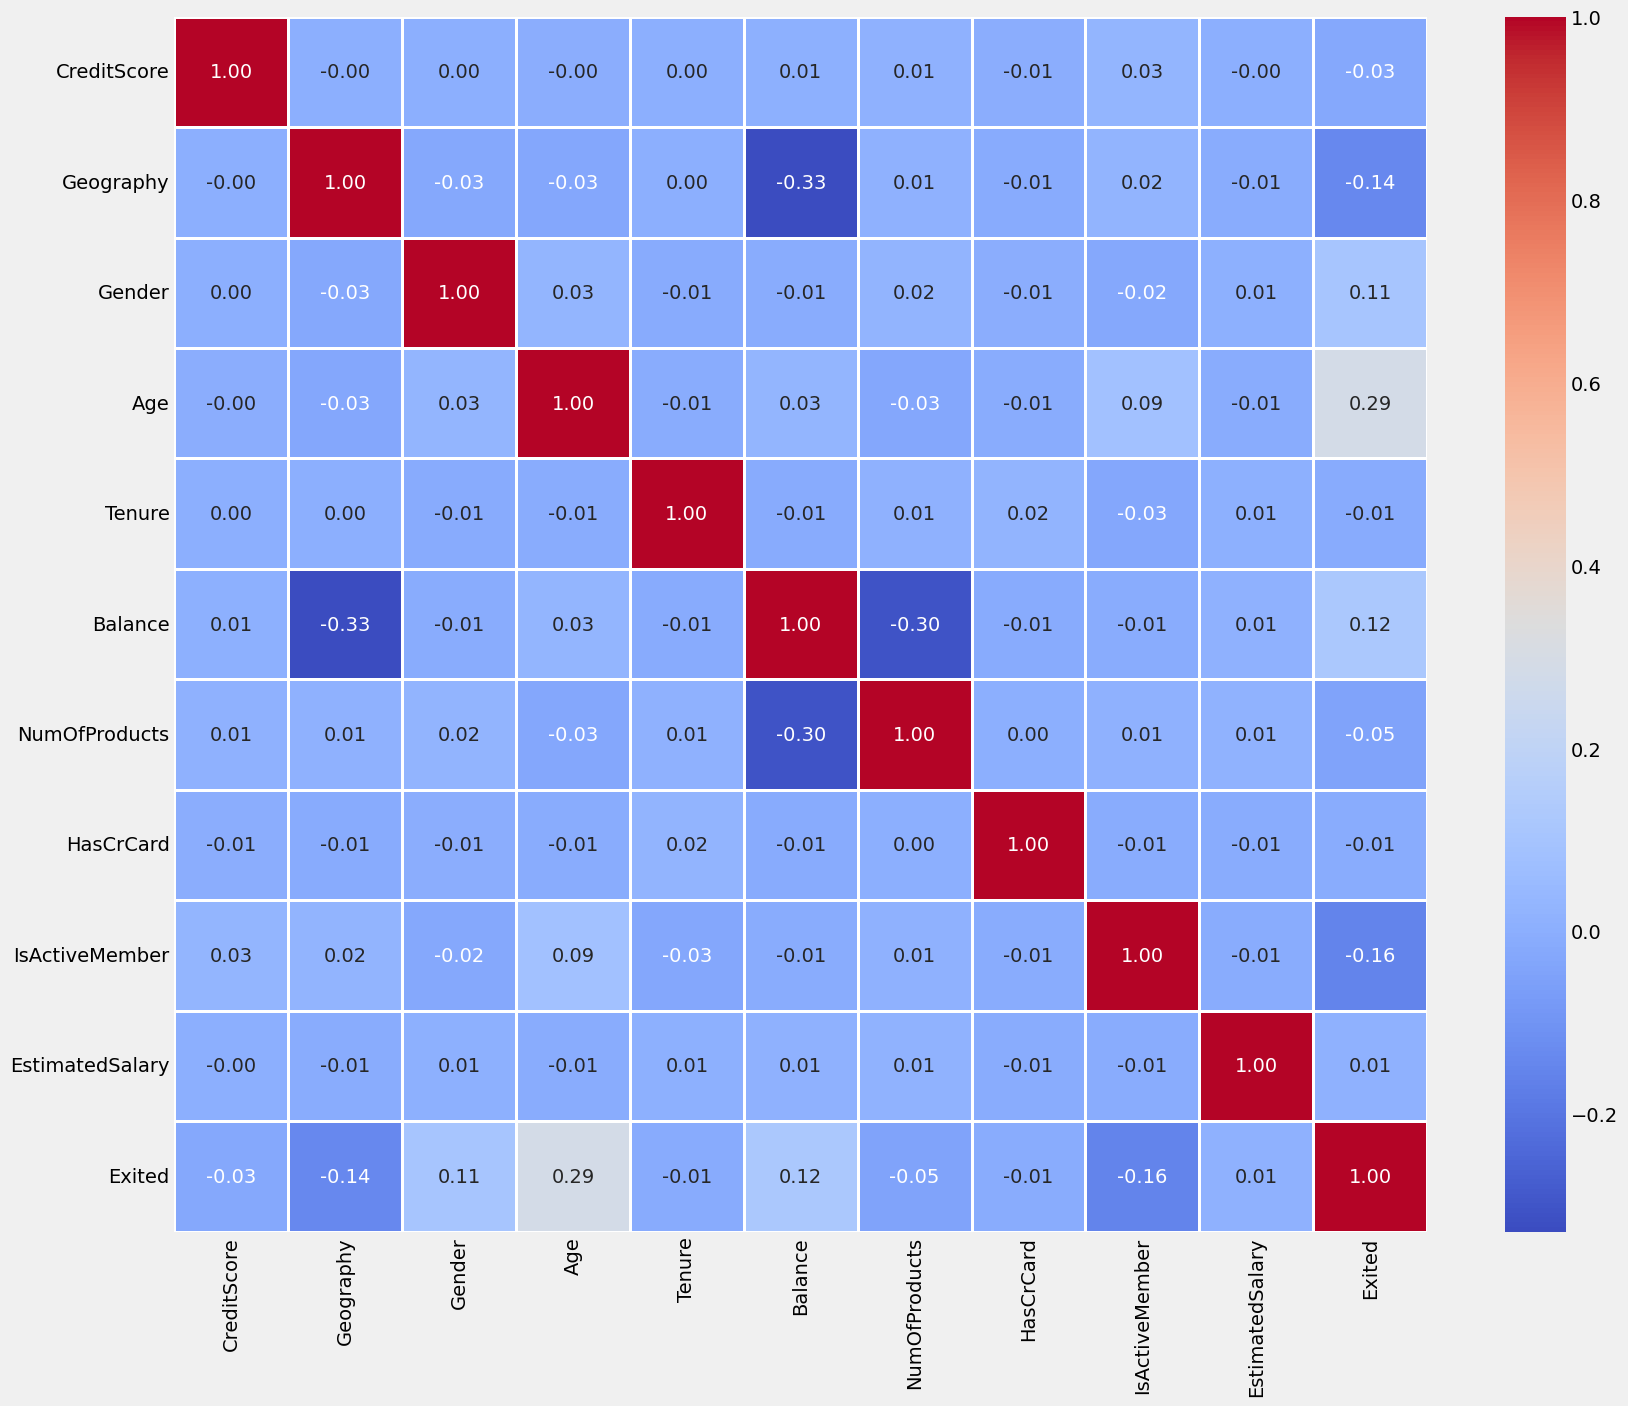

In [16]:
corr = df.corr()
plt.figure(figsize = (18,15))
sns.heatmap(corr,linewidths = 1, annot = True,fmt =".2f",cmap='coolwarm' )
plt.show()

#### Verilerde çoklu doğrusallık bulunmuyor diyebiliriz.

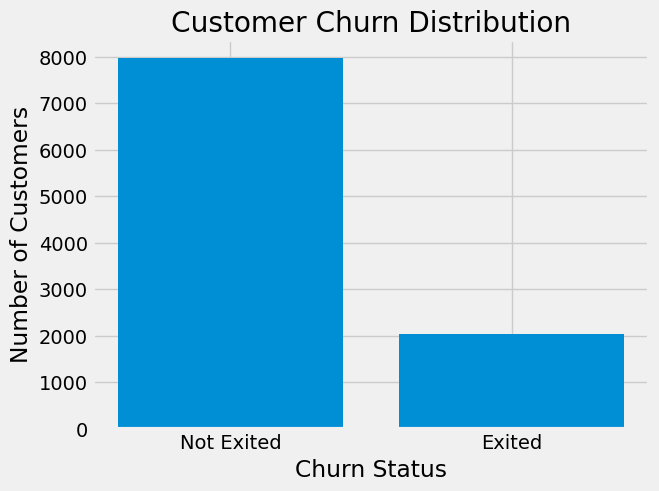

In [17]:
churn_counts = df['Exited'].value_counts()
# Çubuk grafiği oluştur
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

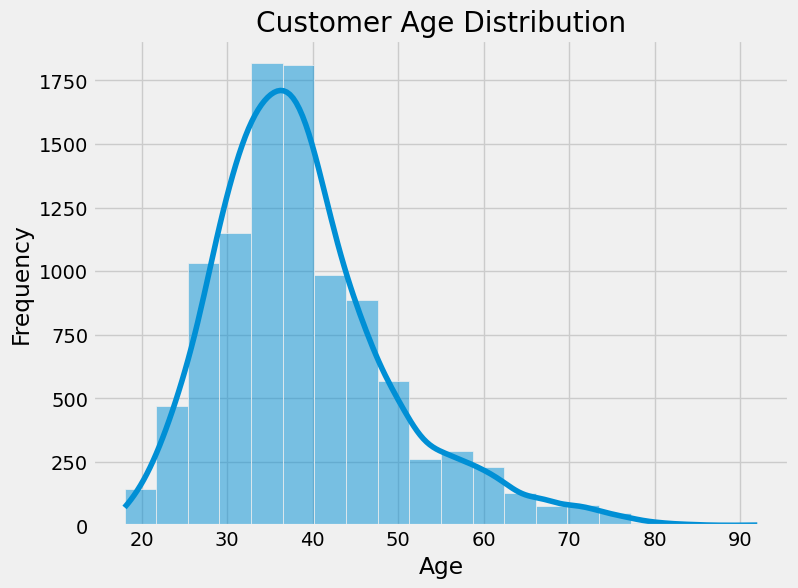

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer Age Distribution')
plt.show()

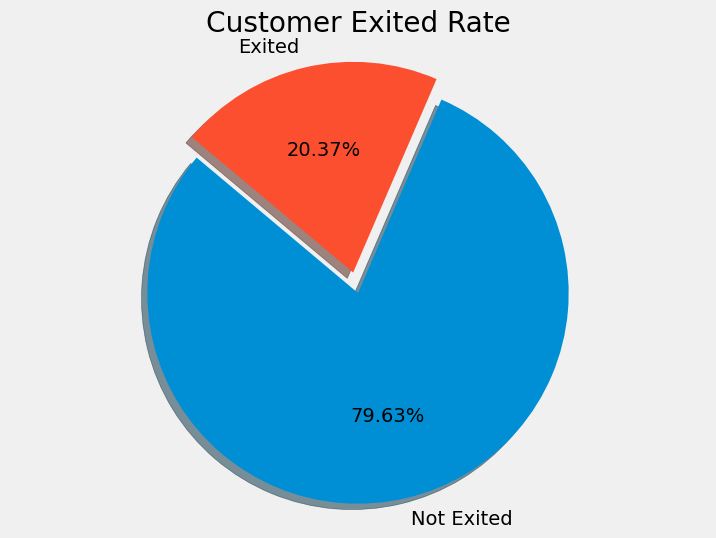

In [19]:
exited_percentage = df['Exited'].value_counts(normalize=True) * 100

explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(exited_percentage, labels=['Not Exited', 'Exited'], autopct='%1.2f%%', startangle=140, explode=explode, shadow=True)
plt.title('Customer Exited Rate')
plt.axis('equal')  
plt.show()

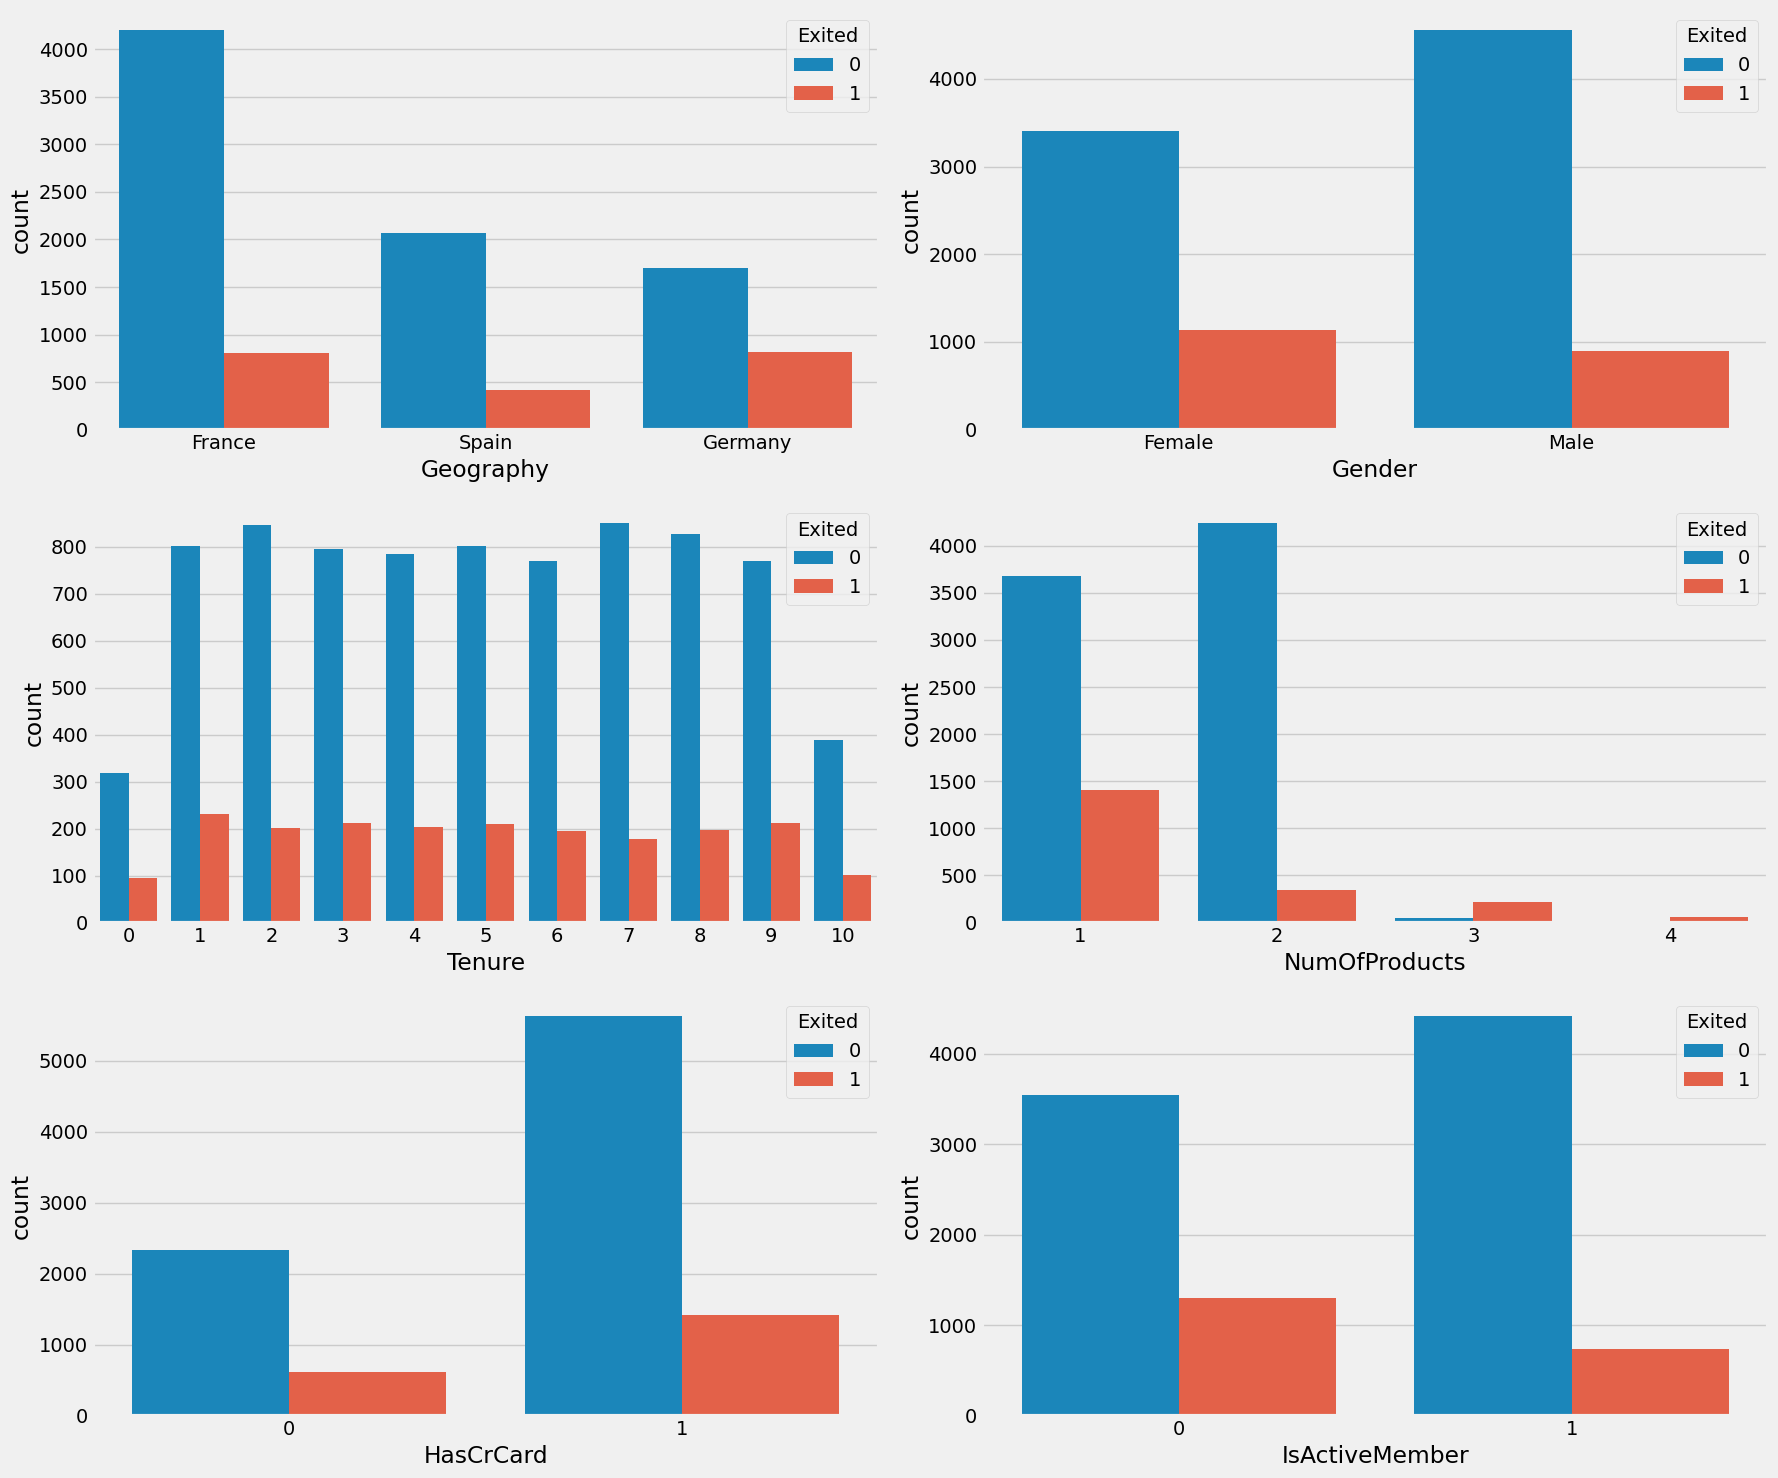

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
sns.countplot(x='Geography', hue='Exited', data=dfr, ax=ax[0, 0])
sns.countplot(x='Gender', hue='Exited', data=dfr, ax=ax[0, 1])
sns.countplot(x='Tenure', hue='Exited', data=dfr, ax=ax[1, 0])
sns.countplot(x='NumOfProducts', hue='Exited', data=dfr, ax=ax[1, 1])
sns.countplot(x='HasCrCard', hue='Exited', data=dfr, ax=ax[2, 0])
sns.countplot(x='IsActiveMember', hue='Exited', data=dfr, ax=ax[2, 1])
plt.tight_layout()
plt.show()


* İlginç bir şekilde, müşteri kaybına uğrayan müşterilerin çoğunluğu kredi kartı sahibidir, ancak müşterilerin çoğunluğu    kredi kartına sahip olduğu için bu bir tesadüf olabilir.

* Müşterilerin çoğunluğu Fransa'dandı, ancak geçiş yapan müşterilerin çoğu, belki de müşteri sayısının az olması nedeniyle kaynak yetersizliğinden dolayı Almanya'dan olabilir.

* Çıkış yapan kadın müşterilerin oranı da erkek müşterilere göre daha yüksektir.

* Müşterilerin çoğunluğu 1 ila 9 yıl arasında vadeye sahiptir ve bu vadelerde kayıp oranı da yüksektir.

* Çoğu müşterinin 1 veya 2 ürünü vardır ve geçiş yapan çoğu müşterinin 1 ürünü vardır, belki de memnun olmadıkları için geçiş yaptılar.

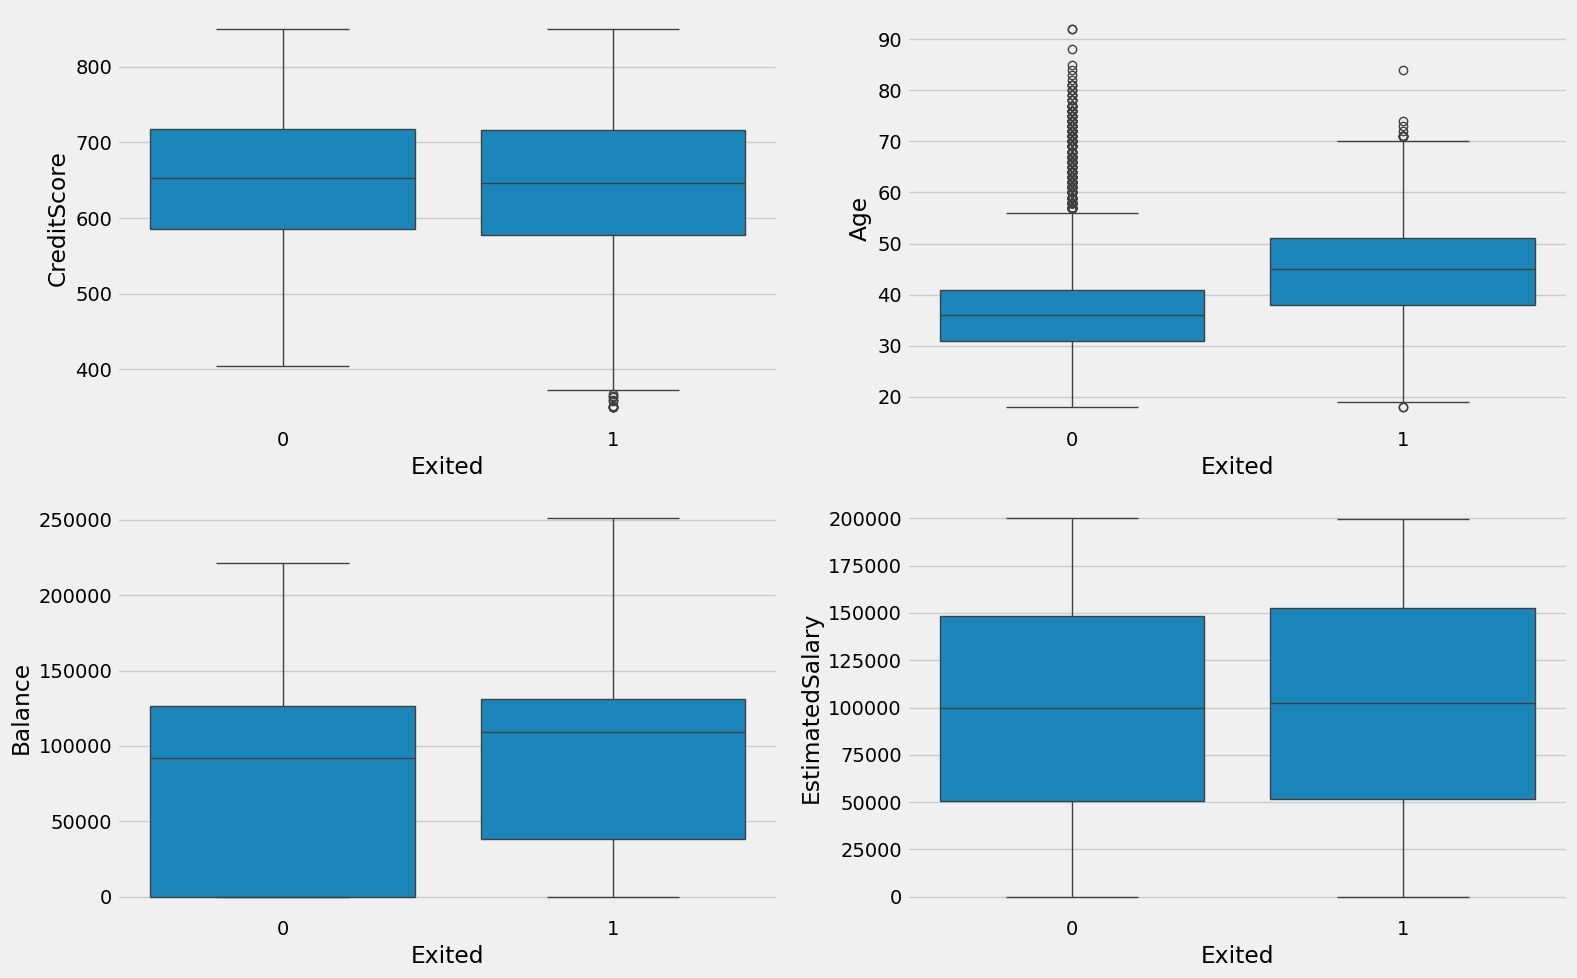

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

* Kredi puanlarının dağılımında müşteri kaybeden ve kaybetmeyen müşteriler arasında önemli bir fark yoktur.
* Yaşlı müşteriler genç müşterilere göre daha çok çıkış yapıyor.
* Tahmni maaşlar benzer dağılıma sahiptir.

## Modelling

In [24]:
X = df.drop("Exited",axis=1)
y= to_categorical(df.Exited)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [24]:
X_test.shape, y_test.shape

((2500, 10), (2500,))

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model  =Sequential()

model.add(Dense(16, kernel_initializer="glorot_uniform",activation = "relu",input_shape=(10, )))

model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

model.add(Dense(8,kernel_initializer="glorot_uniform",activation="relu"))

model.add(Dense(1, kernel_initializer = "glorot_uniform", activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy", metrics =["accuracy"])

model_history = model.fit(X_train,y_train, validation_split=0.25, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6944 - loss: 0.5883 - val_accuracy: 0.8088 - val_loss: 0.4496
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8060 - loss: 0.4543 - val_accuracy: 0.8192 - val_loss: 0.4173
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8195 - loss: 0.4203 - val_accuracy: 0.8260 - val_loss: 0.3982
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8230 - loss: 0.4075 - val_accuracy: 0.8340 - val_loss: 0.3832
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8222 - loss: 0.4061 - val_accuracy: 0.8432 - val_loss: 0.3699
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3792 - val_accuracy: 0.8500 - val_loss: 0.3616
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8354 - loss: 0.3769 - val_accuracy: 0.8516 - val_loss: 0.3552
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8432 - loss: 0.3624 - val_accu

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - loss: 0.3518 - val_accuracy: 0.8572 - val_loss: 0.3460
Epoch 52/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3326 - val_accuracy: 0.8612 - val_loss: 0.3434
Epoch 53/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8560 - loss: 0.3412 - val_accuracy: 0.8608 - val_loss: 0.3430
Epoch 54/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.3456 - val_accuracy: 0.8584 - val_loss: 0.3426
Epoch 55/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.3464 - val_accuracy: 0.8580 - val_loss: 0.3435
Epoch 56/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8640 - loss: 0.3340 - val_accuracy: 0.8576 - val_loss: 0.3418
Epoch 57/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.3461 - val_accuracy: 0.8584 - val_loss: 0.3449
Epoch 58/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3414 - val_accuracy:

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,093 (4.27 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 32 (128.00 B)

 Optimizer params: 708 (2.77 KB)

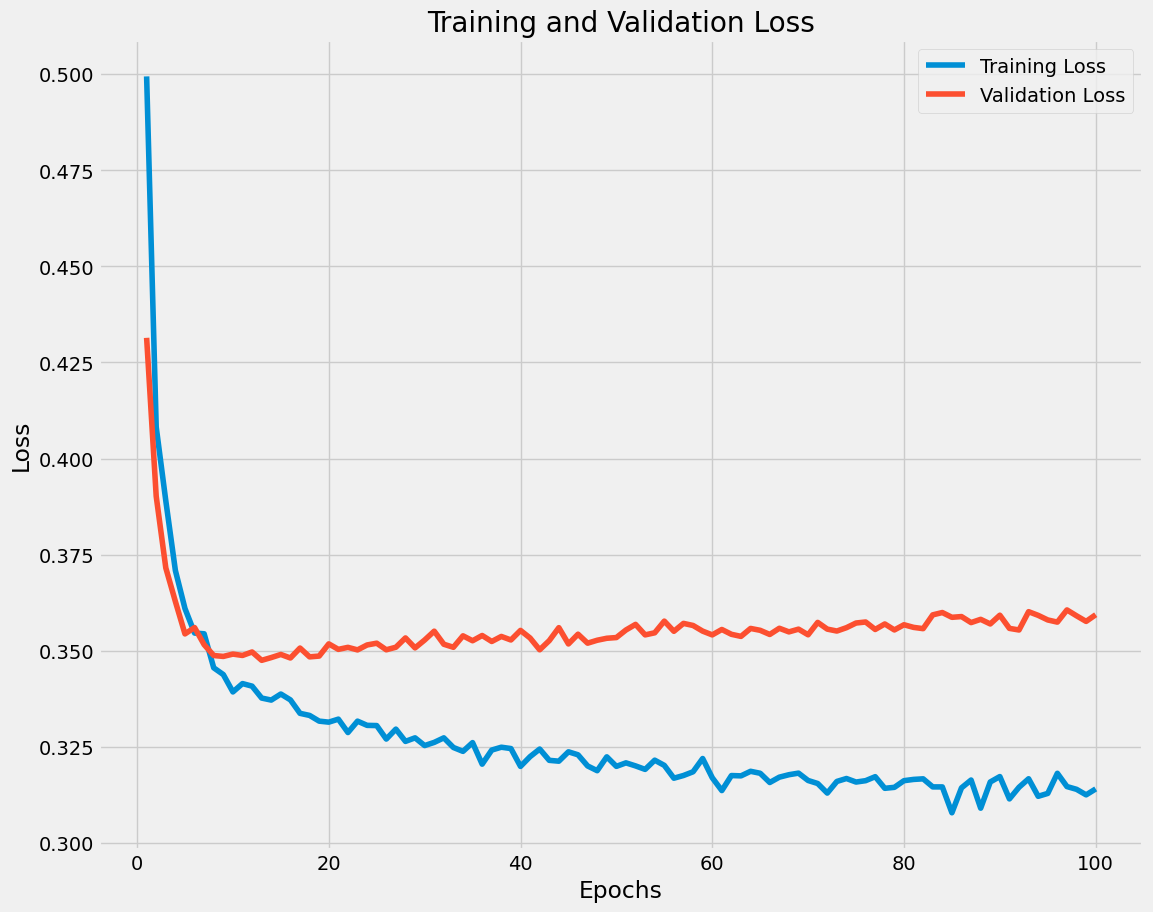

In [59]:
plot_loss(model)

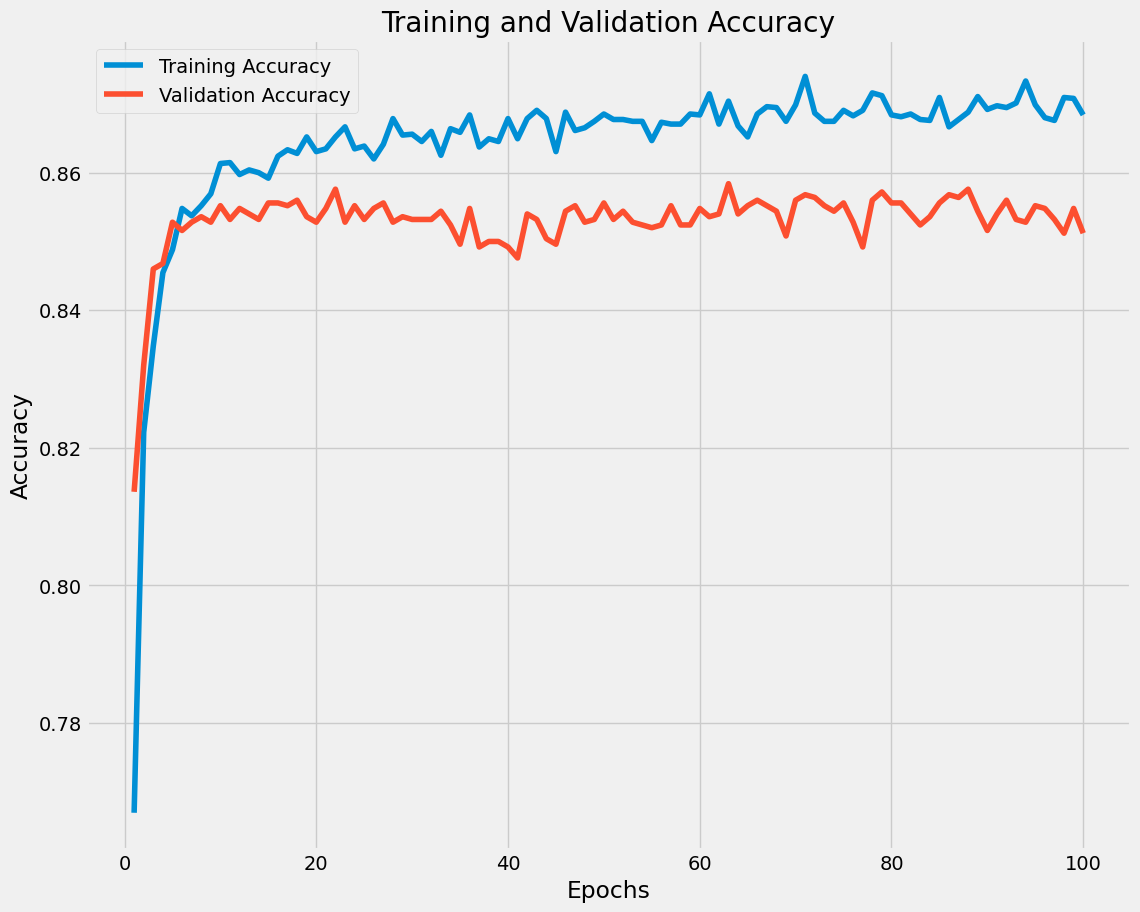

In [60]:
plot_acc(model)

In [29]:
model1  =Sequential()

model1.add(Dense(16, kernel_initializer="glorot_normal",activation = "relu",input_shape=(10, )))

model1.add(Dropout(rate=0.1))
model1.add(BatchNormalization())

model1.add(Dense(8,kernel_initializer="glorot_normal",activation="relu"))

model1.add(Dense(1, kernel_initializer = "glorot_normal", activation="sigmoid"))

model1.compile(optimizer="adam",loss="binary_crossentropy", metrics =["accuracy"])

model_history = model1.fit(X_train,y_train, validation_split=0.25, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6601 - loss: 0.6134 - val_accuracy: 0.7948 - val_loss: 0.4835
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7999 - loss: 0.4796 - val_accuracy: 0.8064 - val_loss: 0.4345
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.4401 - val_accuracy: 0.8124 - val_loss: 0.4186
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8015 - loss: 0.4421 - val_accuracy: 0.8148 - val_loss: 0.4072
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8155 - loss: 0.4271 - val_accuracy: 0.8312 - val_loss: 0.3941
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8301 - loss: 0.4019 - val_accuracy: 0.8388 - val_loss: 0.3805
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8223 - loss: 0.4083 - val_accuracy: 0.8412 - val_loss: 0.3746
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8464 - loss: 0.3732 - val_accu

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8616 - loss: 0.3360 - val_accuracy: 0.8576 - val_loss: 0.3426
Epoch 52/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3474 - val_accuracy: 0.8568 - val_loss: 0.3415
Epoch 53/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.3553 - val_accuracy: 0.8584 - val_loss: 0.3416
Epoch 54/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3505 - val_accuracy: 0.8604 - val_loss: 0.3401
Epoch 55/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8637 - loss: 0.3373 - val_accuracy: 0.8616 - val_loss: 0.3417
Epoch 56/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.3380 - val_accuracy: 0.8588 - val_loss: 0.3430
Epoch 57/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - loss: 0.3295 - val_accuracy: 0.8600 - val_loss: 0.3422
Epoch 58/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8636 - loss: 0.3430 - val_accuracy:

In [31]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,093 (4.27 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 32 (128.00 B)

 Optimizer params: 708 (2.77 KB)

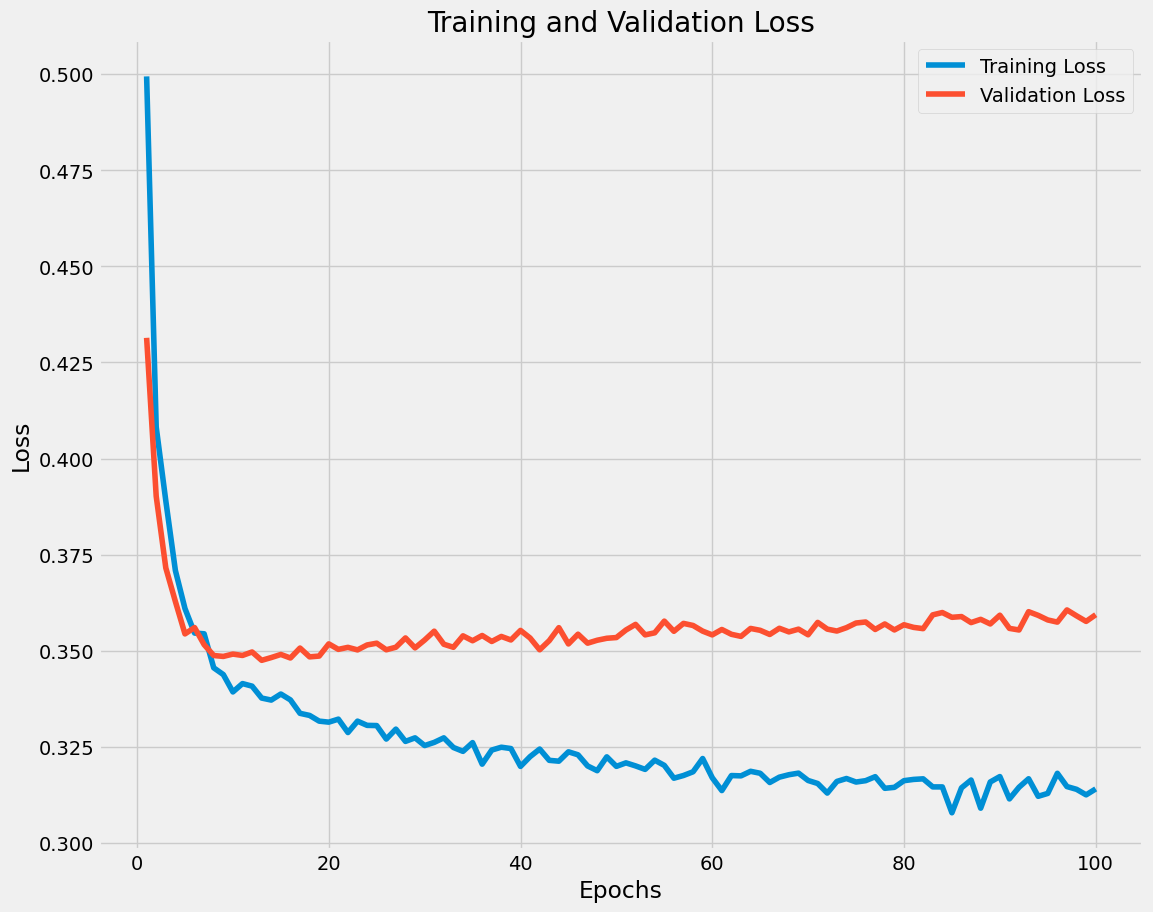

In [61]:
plot_loss(model1)

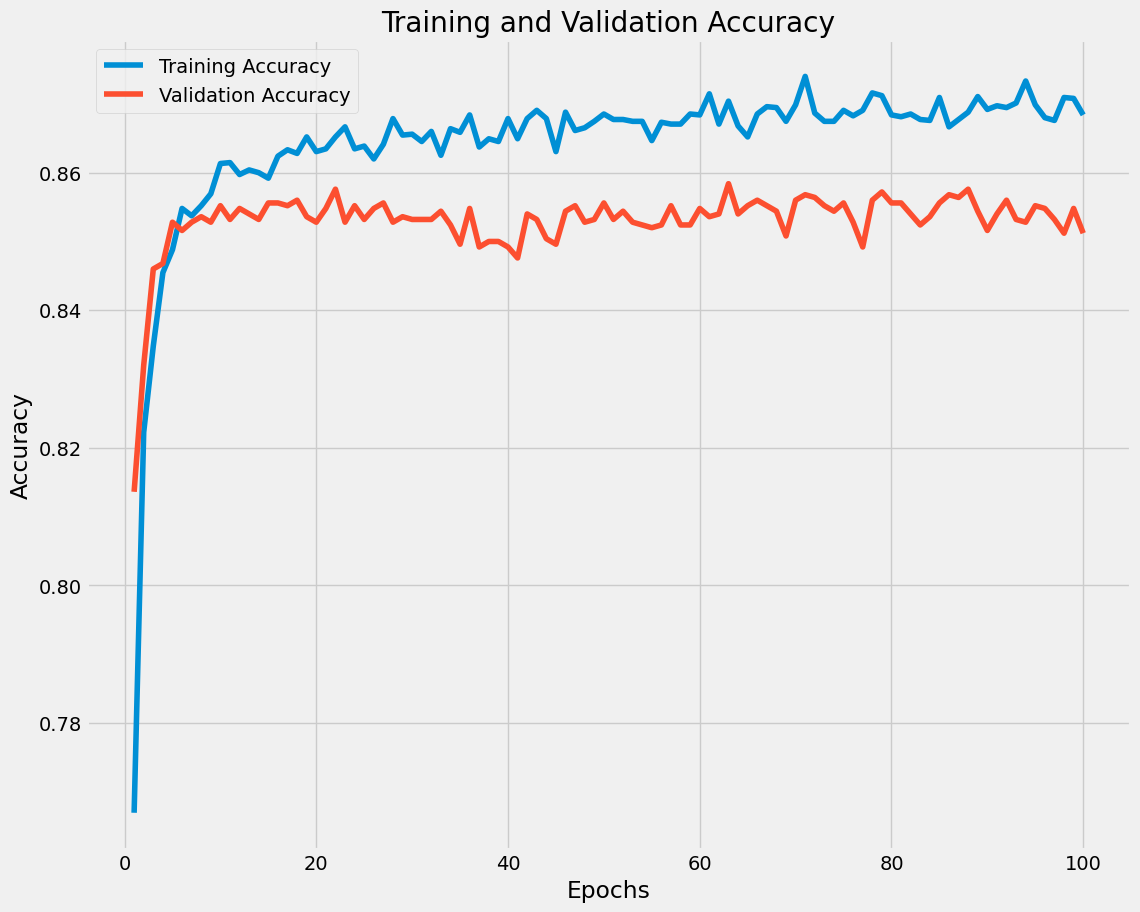

In [62]:
plot_acc(model1)

In [32]:
model2  =Sequential()

model2.add(Dense(24, kernel_initializer="glorot_normal",activation = "relu",input_shape=(10, )))

model2.add(Dropout(rate=0.01))
model2.add(BatchNormalization())

model2.add(Dense(12,kernel_initializer="glorot_normal",activation="relu"))

model2.add(Dense(1, kernel_initializer = "glorot_normal", activation="sigmoid"))

model2.compile(optimizer="adam",loss="binary_crossentropy", metrics =["accuracy"])

model_history = model2.fit(X_train,y_train, validation_split=0.25, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7025 - loss: 0.5773 - val_accuracy: 0.8136 - val_loss: 0.4314
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8232 - loss: 0.4112 - val_accuracy: 0.8320 - val_loss: 0.3902
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.3836 - val_accuracy: 0.8460 - val_loss: 0.3716
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8413 - loss: 0.3782 - val_accuracy: 0.8468 - val_loss: 0.3628
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8454 - loss: 0.3674 - val_accuracy: 0.8528 - val_loss: 0.3544
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8574 - loss: 0.3540 - val_accuracy: 0.8516 - val_loss: 0.3560
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.3515 - val_accuracy: 0.8528 - val_loss: 0.3516
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3507 - val_accu

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3218 - val_accuracy: 0.8532 - val_loss: 0.3554
Epoch 52/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8677 - loss: 0.3164 - val_accuracy: 0.8544 - val_loss: 0.3569
Epoch 53/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.3192 - val_accuracy: 0.8528 - val_loss: 0.3541
Epoch 54/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8708 - loss: 0.3183 - val_accuracy: 0.8524 - val_loss: 0.3547
Epoch 55/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8596 - loss: 0.3330 - val_accuracy: 0.8520 - val_loss: 0.3577
Epoch 56/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8733 - loss: 0.3112 - val_accuracy: 0.8524 - val_loss: 0.3551
Epoch 57/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3185 - val_accuracy: 0.8552 - val_loss: 0.3571
Epoch 58/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3162 - val_accuracy:

In [33]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 24)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 1,252 (4.89 KB)

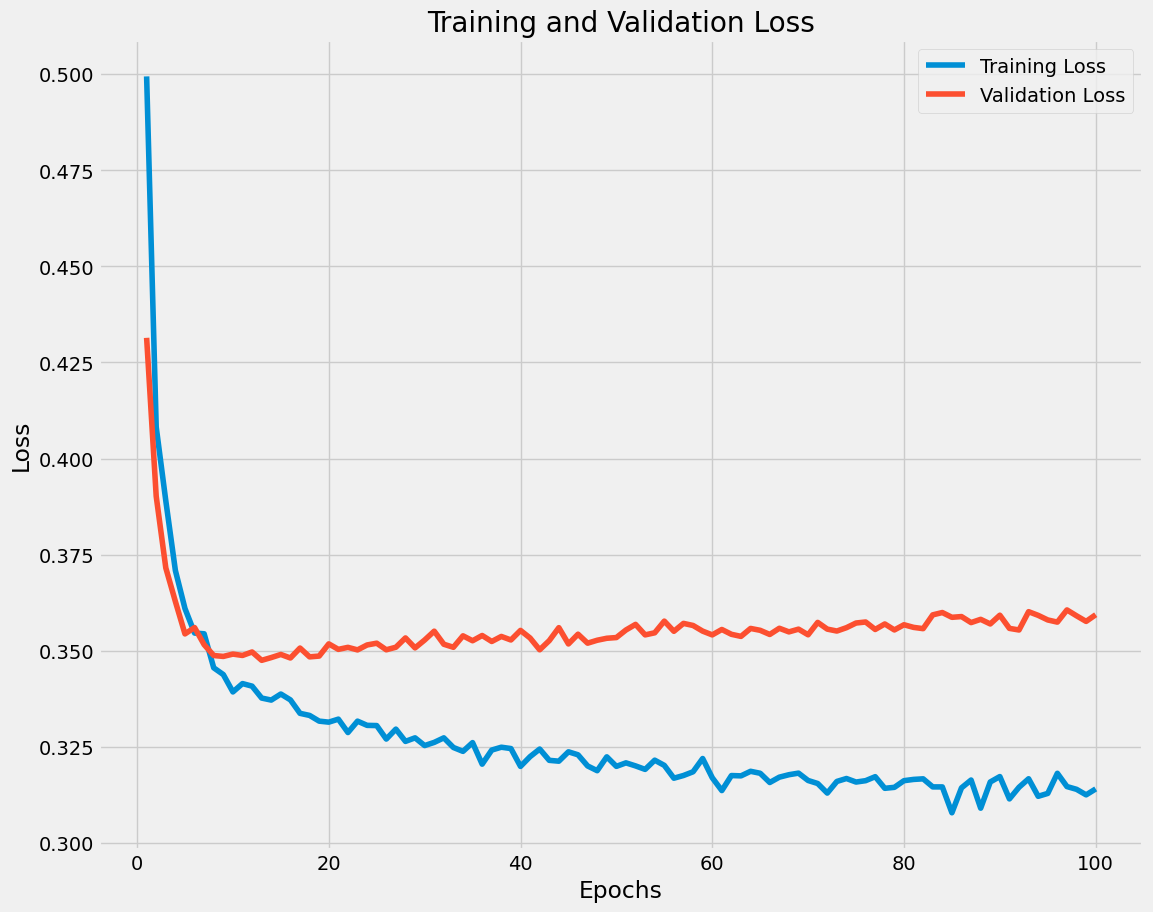

In [63]:
plot_loss(model2)

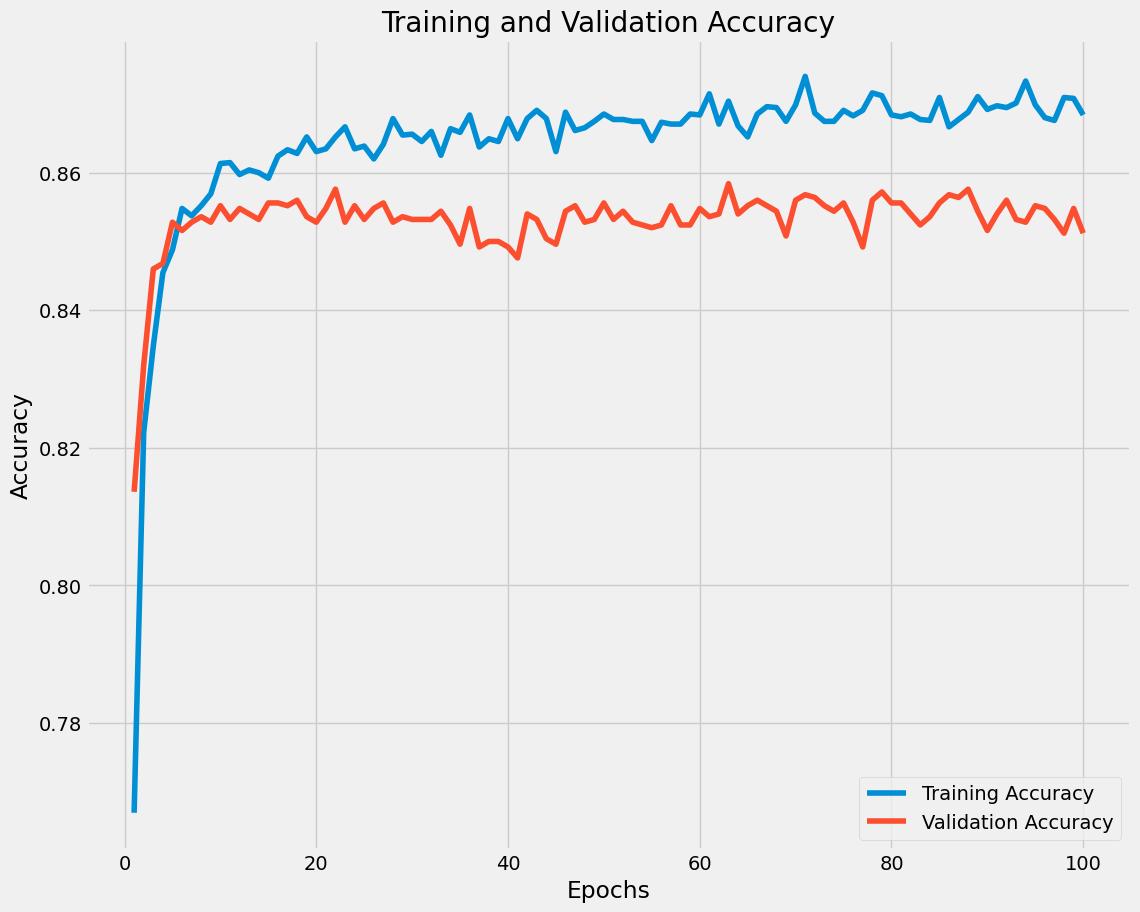

In [66]:
plot_acc(model2)